In [1]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(),".."))
sys.path.append(project_root)

In [2]:
import pandas as pd

dfs = []
dfs.append(pd.read_csv('../data/260127/6_SiPM_PrernaMark_Ch1-4_Ch2_Ch5-8_Ch14_Cs137_28.5V_threshold10.csv'))
dfs.append(pd.read_csv('../data/260127/7_SiPM_PrernaMark_Ch1-4_Ch2_Ch5-8_Ch14_Cs137_28.5V_threshold20.csv'))
dfs.append(pd.read_csv('../data/260127/8_SiPM_PrernaMark_Ch1-4_Ch2_Ch5-8_Ch14_Cs137_28.5V_threshold5.csv'))
dfs.append(pd.read_csv('../data/260127/9_SiPM_PrernaMark_Ch1-4_Ch2_Ch5-8_Ch14_Cs137_28.5V_threshold15.csv'))

dfs[3]

,Detector,ID,Trigger,Time_sub,Time_sec,Time_gps,Temp,Ch1,Ch2,Ch3,...,Ch9,Ch10,Ch11,Ch12,Ch13,Ch14,Ch15,Ch16,Argmax,Summed
0,5,600001,21,595446,3842,42069,149,151,614,106,...,130,141,124,118,121,527,110,137,2,2893
1,5,600002,21,610680,3842,42069,149,150,621,104,...,131,140,125,118,122,689,110,137,14,3062
2,5,600003,21,620254,3842,42069,149,150,482,105,...,130,141,122,118,120,372,108,136,2,2597
3,5,600004,21,630512,3842,42069,149,151,476,104,...,130,141,123,118,120,405,109,137,2,2629
4,5,600005,21,638502,3842,42069,149,150,799,106,...,129,141,125,118,121,551,109,137,2,3104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99673,5,699995,20,10745499,4287,42069,149,151,915,106,...,131,142,124,118,122,981,109,137,14,3657
99674,5,699996,21,11026960,4287,42069,149,151,900,105,...,131,140,124,119,121,666,108,138,2,3320
99675,5,699997,20,11026960,4287,42069,149,152,1074,105,...,131,142,125,119,121,957,110,137,2,3790
99676,5,699998,20,11026960,4287,42069,149,150,975,106,...,130,141,123,119,121,698,109,137,2,3421


In [3]:
import matplotlib.pyplot as plt

N_BINS = 512
BITS_12 = 2**12

summed_spectra = [df['Summed'].tolist() for df in dfs]

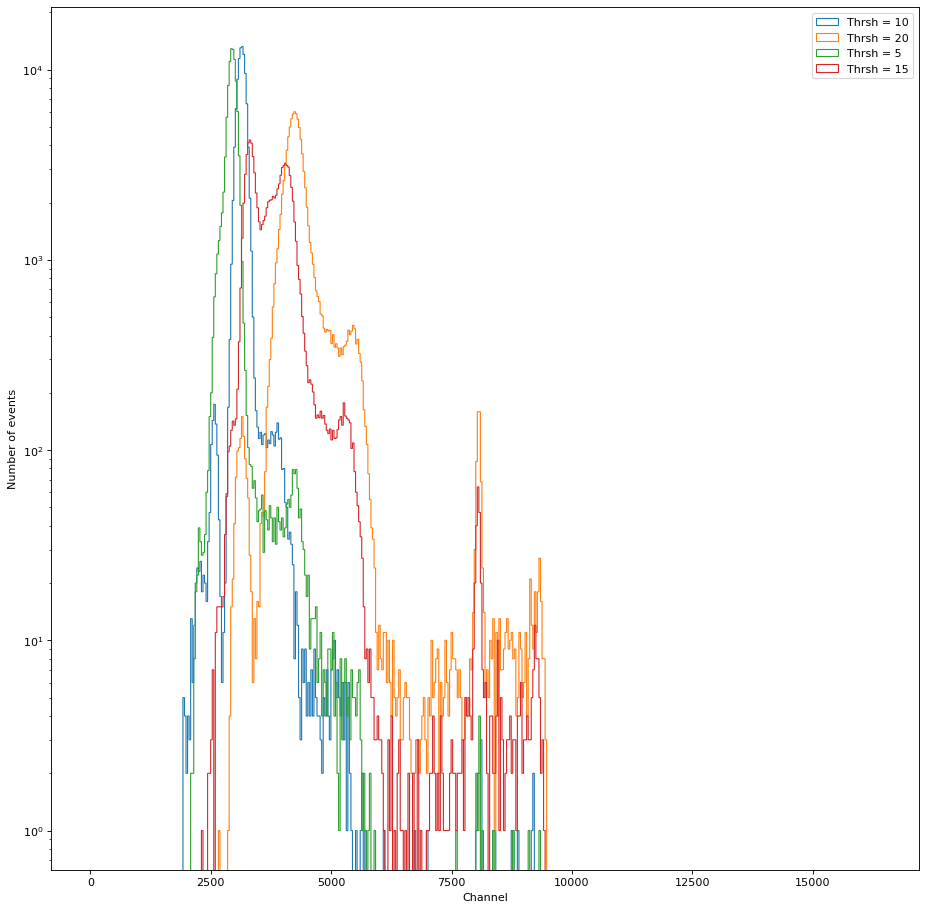

In [5]:
plt.figure(figsize=(14,14), dpi=80)
legend = ['Thrsh = 10', 'Thrsh = 20', 'Thrsh = 5', 'Thrsh = 15']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0, 4*BITS_12), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Number of events')
plt.show()

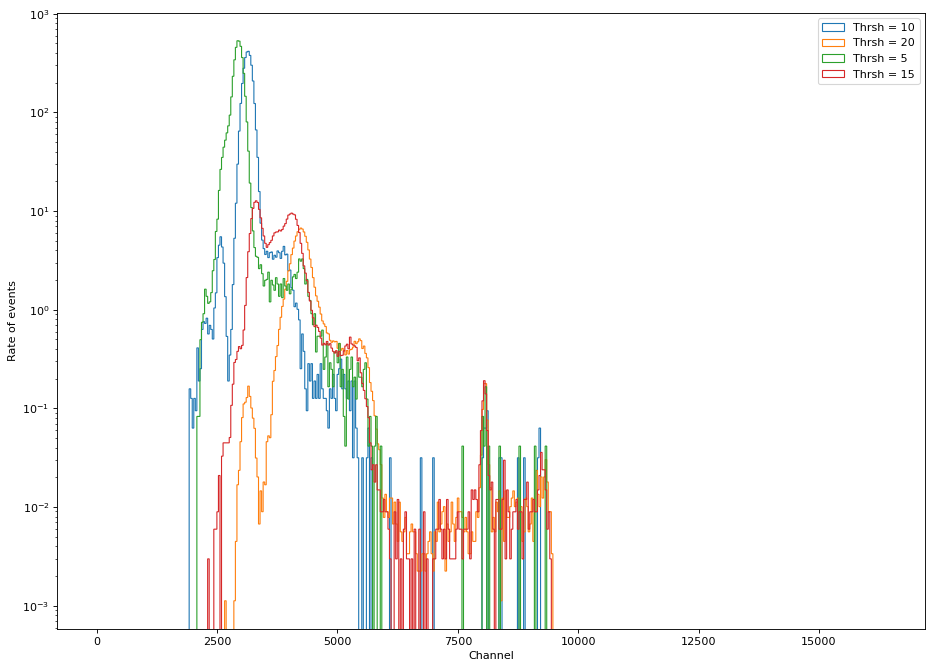

In [8]:
import numpy as np
times = [31.708, 893.006, 24.152, 335.703]
plt.figure(figsize=(14,10), dpi=80)
legend = ['Thrsh = 10', 'Thrsh = 20', 'Thrsh = 5', 'Thrsh = 15']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(0, 4*BITS_12), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Rate of events')
plt.show()

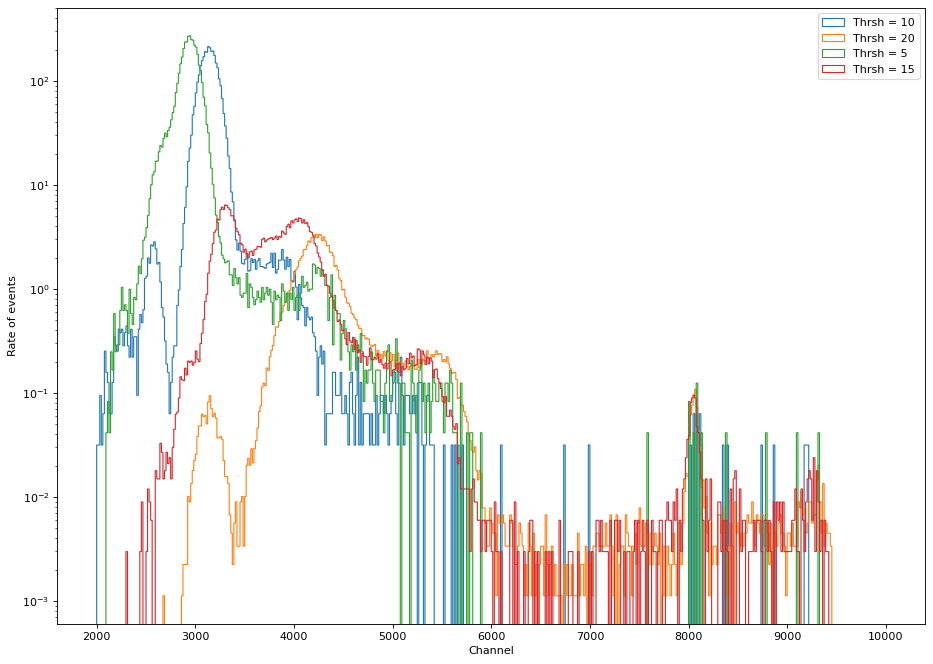

In [11]:
import numpy as np
times = [31.708, 893.006, 24.152, 335.703]
plt.figure(figsize=(14,10), dpi=80)
legend = ['Thrsh = 10', 'Thrsh = 20', 'Thrsh = 5', 'Thrsh = 15']
for idx,s in enumerate(summed_spectra):
    plt.hist(s, N_BINS, range=(2000, 10000), weights=(1/times[idx])*np.ones_like(s), log=True, histtype='step', label=legend[idx])
plt.legend()
plt.xlabel('Channel')
plt.ylabel('Rate of events')
plt.show()